# Iterated Prisoner's Dilemma

This project uses the python package `axelrod`:

In [ ]:
# @misc{axelrodproject,
#   author       = {{ {The Axelrod project developers} }},
#   title        = {Axelrod: <RELEASE TITLE>},
#   month        = apr,
#   year         = 2016,
#   doi          = {<DOI INFORMATION>},
#   url          = {http://dx.doi.org/10.5281/zenodo.<DOI NUMBER>}
# }

In [4]:
import axelrod as axl
import matplotlib.pyplot as plt

## Axelrod's First Tournament

### Initialisation

As Axelrod claimed, had `TitFor2Tats` been added to the pool of strategies in the first tournament, it would have scored the highest.

In [55]:
# Initialise all strategies from the first tournament
first_tournament_strategies = [s for s in axl.axelrod_first_strategies]

In [56]:
# Add Titfor2Tats
first_tournament_strategies.append(axl.TitFor2Tats)

In [23]:
# Listing all strategies + TitFor2Tats
first_tournament_players = [s() for s in first_tournament_strategies]
first_tournament_players

[Tit For Tat,
 First by Tideman and Chieruzzi: (D, D),
 First by Nydegger,
 First by Grofman,
 First by Shubik,
 First by Stein and Rapoport: 0.05: (D, D),
 Grudger,
 First by Davis: 10,
 First by Graaskamp: 0.05,
 First by Downing,
 First by Feld: 1.0, 0.5, 200,
 First by Joss: 0.9,
 First by Tullock,
 First by Anonymous,
 Random: 0.5,
 Tit For 2 Tats]

### First instance of the Tournament

It is possible to call `axl.Tournament` function to simulate an Axelrod tournament. This function takes in arguments:
- players/strategies
- no of turns (fixed at 200)
- repetitions (fixed at 5)
- seed (to simulate different instances)

In [30]:
def play_first_tournament(players, seed):
    tournament = axl.Tournament(
        players=players,
        turns=200,
        repetitions=5,
        seed=seed)

    results = tournament.play()
    return(results)

For the first tournament, the seed is set to 1 and the results are stored in `tour1` after all matches are played for the 5 repetitions

In [31]:
tour1 = play_first_tournament(first_tournament_players, 1)

Analysing: 100%|██████████| 25/25 [00:00<00:00, 60.79it/s]


Firstly, the strategies and their respective rankings are published from best performing to worst:

In [93]:
ranking = {name: pos + 1 for pos, name in enumerate(tour1.ranked_names)}

As expected, `TitFor2Tat` comes out on top! But what happened to the original `TitForTat`? It is now ranked 4:

In [64]:
print("Ranking:")
for pos, name in enumerate(tour1.ranked_names):
    print(f'{pos+1}: {name}')

Ranking:
1: Tit For 2 Tats
2: First by Stein and Rapoport: 0.05: (D, D)
3: Tit For Tat
4: First by Grofman
5: First by Shubik
6: First by Tideman and Chieruzzi: (D, D)
7: First by Nydegger
8: Grudger
9: First by Davis: 10
10: First by Graaskamp: 0.05
11: First by Downing
12: First by Feld: 1.0, 0.5, 200
13: First by Tullock
14: First by Joss: 0.9
15: Random: 0.5
16: First by Anonymous


As noted by a number of researchers, `TitForTat` performs poorly in individual iteractions. To confirm this observation, it will be helpful to display a ranking according to the number of wins. As 5 iterations of matches were played, an average score will be calculated for each strategy.

In [116]:
wins = [w for w in tour1.wins]
avg_wins = {str(name): sum(win)/len(win) for name, win in zip(first_tournament_players, wins)}
ranked_avg_wins = {k: v for k, v in sorted(avg_wins.items(), key=lambda item: item[1], reverse=True)}

Both versions of `TitForTat` scored 0 suggesting they actually won 0 of their individual encounters.

In [146]:
ranked_avg_wins

{'First by Tideman and Chieruzzi: (D, D)': 12.0,
 'First by Joss: 0.9': 11.4,
 'First by Stein and Rapoport: 0.05: (D, D)': 11.0,
 'First by Feld: 1.0, 0.5, 200': 10.4,
 'First by Tullock': 9.0,
 'First by Downing': 8.0,
 'First by Graaskamp: 0.05': 5.0,
 'Grudger': 5.0,
 'Random: 0.5': 4.6,
 'First by Anonymous': 4.0,
 'First by Davis: 10': 4.0,
 'First by Shubik': 3.0,
 'First by Grofman': 1.0,
 'Tit For 2 Tats': 0.0,
 'Tit For Tat': 0.0,
 'First by Nydegger': 0.0}

Similar displaying the number of wins, it is also possible to display each strategies overall score (the score is what determines the ranking). Notice that the difference between `TitFor2Tats` and the strategy in second place is fairly minimal.

In [122]:
scores_1 = [s for s in tour1.scores]
avg_scores_1 = {str(name): sum(scores_1)/len(scores_1) for name, scores_1 in zip(first_tournament_players, scores_1)}
ranked_avg_scores_1 = {k: v for k, v in sorted(avg_scores_1.items(), key=lambda item: item[1], reverse=True)}
ranked_avg_scores_1

{'Tit For 2 Tats': 7796.6,
 'First by Stein and Rapoport: 0.05: (D, D)': 7728.6,
 'First by Grofman': 7647.6,
 'Tit For Tat': 7572.6,
 'First by Tideman and Chieruzzi: (D, D)': 7528.8,
 'First by Shubik': 7518.6,
 'First by Nydegger': 7491.2,
 'Grudger': 7322.6,
 'First by Davis: 10': 7306.6,
 'First by Downing': 6974.8,
 'First by Graaskamp: 0.05': 6931.8,
 'First by Feld: 1.0, 0.5, 200': 5763.2,
 'First by Joss: 0.9': 5537.6,
 'First by Tullock': 5510.0,
 'First by Anonymous': 5227.6,
 'Random: 0.5': 5142.0}

### Second instance of the Tournament

One other experiment to consider is trying a different seed to identify if TitFor2Tat performs consistenty. Setting the seed to 2, it is observed that `TitFor2Tats` ranked second this time - with the best performing being `First by Stein and Rapoport: 0.05: (D, D)`. The original `TitFor2Tats` dropped down even lower at rank 5.

In [147]:
tour2 = play_first_tournament(first_tournament_players, 2)

Analysing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 289.16it/s]


In [148]:
print("Ranking:")
for pos, name in enumerate(tour2.ranked_names):
    print(f'{pos+1}: {name}')

Ranking:
1: First by Stein and Rapoport: 0.05: (D, D)
2: Tit For 2 Tats
3: First by Grofman
4: First by Shubik
5: Tit For Tat
6: First by Tideman and Chieruzzi: (D, D)
7: First by Nydegger
8: Grudger
9: First by Davis: 10
10: First by Graaskamp: 0.05
11: First by Downing
12: First by Feld: 1.0, 0.5, 200
13: First by Joss: 0.9
14: First by Tullock
15: Random: 0.5
16: First by Anonymous


The differences in the ranking between running with Seed 1 vs Seed 2 can be plotted. Any strategy that is not on the best fit line has a differing ranking. Only a total of 4 strategies had consistent results.

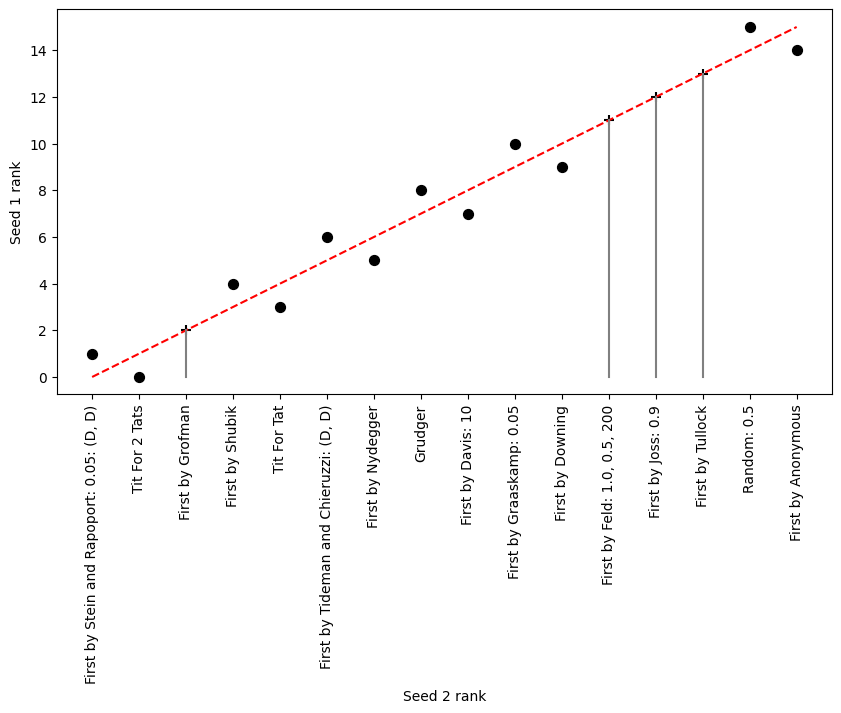

In [137]:
plt.figure(figsize=(10, 5)) 
plt.plot((0, 15), (0, 15), color="red", linestyle="--")  
for original_rank, strategy in enumerate(tour1.ranked_names):
    rank = tour2.ranked_names.index(str(strategy))
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="grey")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50)  
plt.xticks(
    range(len(tour1.ranked_names)),
    tour2.ranked_names,
    rotation=90
)  
plt.ylabel("Seed 1 rank")  
plt.xlabel("Seed 2 rank");  
plt.show()

## Axelrod's Second Tournament

### Initialisation

The second tournament had a lot more entries & many of them do not have prebuilt Python implementations yet. There are only approx. half the strategies (30/63) from the second tournament available without having to build custom strategies. In light of this limitation, it would interesting to run the simulation with only half the pool of strategies to see how `TitForTat` performs.

In [123]:
# initialising all the available strategies from Axelrod's second tournament
second_tournament_participants= [
    axl.axelrod_second.SecondByChampion(), 
    axl.axelrod_second.SecondByEatherley(),
    axl.axelrod_second.SecondByTester(),
    axl.axelrod_second.SecondByGladstein(),
    axl.axelrod_second.SecondByTranquilizer(),
    axl.axelrod_second.SecondByGrofman(),
    axl.axelrod_second.SecondByKluepfel(),
    axl.axelrod_second.SecondByBorufsen(),
    axl.axelrod_second.SecondByCave(),
    axl.axelrod_second.SecondByWmAdams(),
    axl.axelrod_second.SecondByWeiner(),
    axl.axelrod_second.SecondByHarrington(),
    axl.axelrod_second.SecondByTidemanAndChieruzzi(),
    axl.axelrod_second.SecondByGetzler(),
    axl.axelrod_second.SecondByLeyvraz(),
    axl.axelrod_second.SecondByWhite(),
    axl.axelrod_second.SecondByBlack(),
    axl.axelrod_second.SecondByRichardHufford(),
    axl.axelrod_second.SecondByYamachi(),
    axl.axelrod_second.SecondByColbert(),
    axl.axelrod_second.SecondByMikkelson(),
    axl.axelrod_second.SecondByRowsam(),
    axl.axelrod_second.SecondByAppold(),
    axl.TitForTat(),
    axl.TitFor2Tats(),
    axl.Random(),
    axl.WinStayLoseShift(),
    axl.RevisedDowning(),
    axl.Grudger(),
    axl.GoByMajority()
]

In [124]:
# Checking how many strategies exist in the pool
len(second_tournament_participants)

30

### First instance of the Tournament

This time, when setting up the `axl.Tournament` function the no of turns is no longer fixed. Instead a new parameter `prob_end=0.00346` is used to simulate the conditions of the Second Tournament. Every other parameter remains consistent with the First Tournament:
- players/strategies
- probability of ending on given round -> 0.00346
- repetitions (fixed at 5)
- seed (to simulate different instances)

In [125]:
def play_second_tournament(players, seed):
    tournament = axl.Tournament(
        players=players,
        prob_end=0.00346,
        repetitions=5,
        seed=seed)

    results = tournament.play()
    return(results)

In [126]:
second = play_second_tournament(second_tournament_participants, 1)

Analysing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 126.82it/s]


In [129]:
print(f"Tit For Tat Ranking:", second.ranked_names.index("Tit For Tat")+1)
print(f"Tit For 2 Tats Ranking:", second.ranked_names.index("Tit For 2 Tats")+1)

Tit For Tat Ranking: 7
Tit For 2 Tats Ranking: 28


To check the full ranking -  Borufsen, Tideman and Chieruzzi, Tranquilizer, Weiner, Cave, Kluepfel all performed better than the original `TitForTat`:

In [127]:
print("Ranking:")
for pos, name in enumerate(second.ranked_names):
    print(f'{pos+1}: {name}')

Ranking:
1: Second by Borufsen
2: Second by Tideman and Chieruzzi
3: Second by Tranquilizer
4: Second by Weiner
5: Second by Cave
6: Second by Kluepfel
7: Tit For Tat
8: Second by WmAdams
9: Second by Getzler
10: Second by RichardHufford
11: Second by Harrington
12: Second by White
13: Soft Go By Majority
14: Second by Mikkelson
15: Second by Leyvraz
16: Second by Rowsam
17: Second by Black
18: Second by Eatherley
19: Second by Grofman
20: Second by Yamachi
21: Second by Champion
22: Second by Gladstein
23: Second by Tester
24: Second by Appold
25: Second by Colbert
26: Revised Downing
27: Win-Stay Lose-Shift
28: Tit For 2 Tats
29: Grudger
30: Random: 0.5


### Second instance of the Tournament

In [160]:
second2 = play_second_tournament(second_tournament_participants, 2)

Analysing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 124.19it/s]


In [161]:
print(f"Tit For Tat Ranking:", second2.ranked_names.index("Tit For Tat")+1)
print(f"Tit For 2 Tats Ranking:", second2.ranked_names.index("Tit For 2 Tats")+1)

Tit For Tat Ranking: 6
Tit For 2 Tats Ranking: 27


In [195]:
print("Ranking:")
for pos, name in enumerate(second2.ranked_names):
    print(f'{pos+1}: {name}')

Ranking:
1: Second by Tideman and Chieruzzi
2: Second by Weiner
3: Second by Borufsen
4: Second by Kluepfel
5: Second by Cave
6: Tit For Tat
7: Second by RichardHufford
8: Second by Harrington
9: Second by Getzler
10: Second by WmAdams
11: Second by Tranquilizer
12: Second by Grofman
13: Second by Eatherley
14: Second by Leyvraz
15: Second by Rowsam
16: Second by Tester
17: Second by Black
18: Second by Yamachi
19: Second by White
20: Second by Mikkelson
21: Soft Go By Majority
22: Second by Champion
23: Second by Gladstein
24: Second by Colbert
25: Revised Downing
26: Second by Appold
27: Tit For 2 Tats
28: Win-Stay Lose-Shift
29: Grudger
30: Random: 0.5


## Knockout Tournament

### Preliminary Round Robin

Instead of repeating the first tournament, the results can be taken to form the pool of strategies that will play in the Knockout stages. The ranked strategies are splint in half: the top half moving on to the knockout stage and the bottom half are eliminated.

In [248]:
rank = {name: pos + 1 for pos, name in enumerate(tour1.ranking)}

In [249]:
top = []
if len(rank.keys()) % 2 == 0:
    top = sorted(rank, key=rank.get, reverse=False)[:len(rank)//2]
else:
    top = sorted(rank, key=rank.get, reverse=False)[:len(rank)//2]

top_strats = [tour1.players[i] for i in top]

In [250]:
# Conversion of name to actual strategy instance
strategy_name_to_class = {
    'Tit For Tat': axl.TitForTat(),
    'First by Tideman and Chieruzzi: (D, D)': axl.FirstByTidemanAndChieruzzi(),
    'First by Nydegger': axl.FirstByNydegger(),
    'First by Grofman': axl.FirstByGrofman(),
    'First by Shubik': axl.FirstByShubik(),
    'First by Stein and Rapoport: 0.05: (D, D)': axl.FirstBySteinAndRapoport(),
    'Grudger': axl.Grudger(),
    'First by Davis: 10': axl.FirstByDavis(),
    'First by Graaskamp: 0.05': axl.FirstByGraaskamp(),
    'First by Downing': axl.FirstByDowning(),
    'First by Feld: 1.0, 0.5, 200': axl.FirstByFeld(),
    'First by Joss: 0.9': axl.FirstByJoss(),
    'First by Tullock': axl.FirstByTullock(),
    'First by Anonymous': axl.FirstByAnonymous(),
    'Random: 0.5': axl.Random(),
    'Tit For 2 Tats': axl.TitFor2Tats()
}

In [138]:
# Top participants store the strategies to be added to the pool of Knockout Tournament
top_participants = []
for name in top_strats:
    top_participants.append(strategy_name_to_class[name])

### Knockout Tournament Implementation

This implementation of a knockout tournament computes the payoff of 2 competing strategies with the possibility of 3 results:
- Win: the strategy that wins an interaction moves on the the next round
- Lose: the strategy that loses an interaction is eliminated
- Draw: the pair of stratgies which draw will both be eliminated and added to the Draw list.

Rounds of the knockout tournament will continue to play until only 1 strategy remains in which it will be deemed the winner. The tournament may also end if all competing strategies end up in a Draw state. The code can be easily modified to change the objective criterion from overall score to no. of wins by accessing the `match.winner()` variable.

In [318]:
import axelrod as axl
import random

def run_match(player1, player2):
    """
    Run a match between two players and return their scores.
    """
    players = [player1, player2]
    match = axl.Match(players, prob_end=0.00346,)
    match.play()
    # winner = match.winner()
    scores = match.final_score()
    return scores

def run_tournament(players):
    """
    Run a single-elimination tournament with the given players.
    """
    tournament_players = players[:]
    round_number = 1
    draws = []
    while len(tournament_players) > 1:
        print(f"Round {round_number}:")
        winners = []
        for i in range(0, len(tournament_players), 2):
            player1 = tournament_players[i]
            player2 = tournament_players[i + 1]
            scores = run_match(player1, player2)
            final_score1 = scores[0]
            final_score2 = scores[1]
            print(f"{player1.name} vs. {player2.name}")
            if final_score1 > final_score2:
                winners.append(player1)
            elif final_score1 < final_score2:
                winners.append(player2)
            else:
                draws.append(player1)
                draws.append(player2)
        print(f"Moving on to next round: {[w.name for w in winners]}")
        tournament_players = winners
        round_number += 1

    print(f"Draws: {draws}")

    if len(tournament_players) > 0:
        print(f"Winner: {tournament_players[0].name}")

### Tournament with Strategies from Round Robin

In [252]:
# Randomises the strategy pairings
random.shuffle(top_participants)

In [263]:
run_tournament(top_participants)

Round 1:
First by Nydegger vs. Tit For Tat: 57 vs. 57
First by Tideman and Chieruzzi vs. First by Shubik: 561 vs. 561
Tit For 2 Tats vs. First by Grofman: 753 vs. 753
Grudger vs. First by Stein and Rapoport: 1425 vs. 1425
Moving on to next round: []
Draws: [First by Nydegger, Tit For Tat, First by Tideman and Chieruzzi: (D, D), First by Shubik, Tit For 2 Tats, First by Grofman, Grudger, First by Stein and Rapoport: 0.05: (D, D)]


### Tournament with ALL Strategies from first Axelrod Tournament

In [314]:
random.shuffle(first_tournament_players)

In [351]:
run_tournament(first_tournament_players)

Round 1:
First by Grofman vs. First by Joss
First by Stein and Rapoport vs. First by Shubik
Tit For 2 Tats vs. First by Tideman and Chieruzzi
First by Feld vs. Tit For Tat
First by Downing vs. Random
First by Anonymous vs. First by Graaskamp
First by Nydegger vs. First by Davis
First by Tullock vs. Grudger
Moving on to next round: ['First by Joss', 'First by Feld', 'First by Downing', 'Grudger']
Round 2:
First by Joss vs. First by Feld
First by Downing vs. Grudger
Moving on to next round: ['First by Joss', 'Grudger']
Round 3:
First by Joss vs. Grudger
Moving on to next round: ['First by Joss']
Draws: [First by Stein and Rapoport: 0.05: (D, D), First by Shubik, Tit For 2 Tats, First by Tideman and Chieruzzi: (D, D), First by Anonymous, First by Graaskamp: 0.05, First by Nydegger, First by Davis: 10]
Winner: First by Joss
